In [39]:
# 기본 경로
path = ''

# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'


In [40]:
# 구별 버스 정류장 데이터불러오기
df_seoul_bus_station = pd.read_csv(path + 'df_seoul_bus_station.csv')

# 확인
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994


In [41]:
# 구별 유동인구 데이터 불러오기
df_seoul_moving = pd.read_csv(path + 'df_seoul_moving.csv')

# 확인
df_seoul_moving.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01


In [42]:
#  구별 상권 데이터 불러오기
df_seoul_business = pd.read_csv(path + 'df_seoul_business.csv')

# 확인
df_seoul_business.head()

,자치구,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,업종합계
0,종로구,215,5912,646,889,480,3613,962,1413,382,1982,16494
1,중구,235,6414,333,1152,816,3542,24248,982,175,2121,40018
2,용산구,523,2987,466,1214,777,2076,317,1332,573,1184,11449
3,성동구,2527,2785,1161,1453,851,1859,1572,621,1494,1545,15868
4,광진구,1744,2861,985,1313,1337,1887,687,1577,1646,1678,15715


In [43]:
# 구별 인구 데이터 불러오기
df_seoul_people = pd.read_csv(path + 'df_seoul_people.csv')

# 확인
df_seoul_people.head()

,자치구,남자,여자,합계
0,종로구,71654,78390,150044
1,중구,63365,68392,131757
2,용산구,105480,113343,218823
3,성동구,136779,146555,283334
4,광진구,166541,183141,349682


In [81]:
# 네 개의 데이터프레임 조인(megre)
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df = pd.merge(df, df_seoul_business, how='inner', on='자치구')
df = pd.merge(df, df_seoul_people, how='inner', on='자치구')

In [82]:
# 확인
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,...,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,업종합계,남자,여자,합계
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,...,6255,7273,8320,2528,9020,5008,59402,268993,293762,562755
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,...,1429,1660,1433,1349,2104,1459,21358,228197,239705,467902
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,...,997,1095,94,1275,740,1176,12526,139260,150567,289827
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,...,1751,2530,700,1709,2347,2274,27031,270025,294460,564485
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,...,1604,2049,190,1672,1230,1628,17825,248571,248566,497137


In [103]:
df.to_csv(path + '최종파일.csv', index=False)

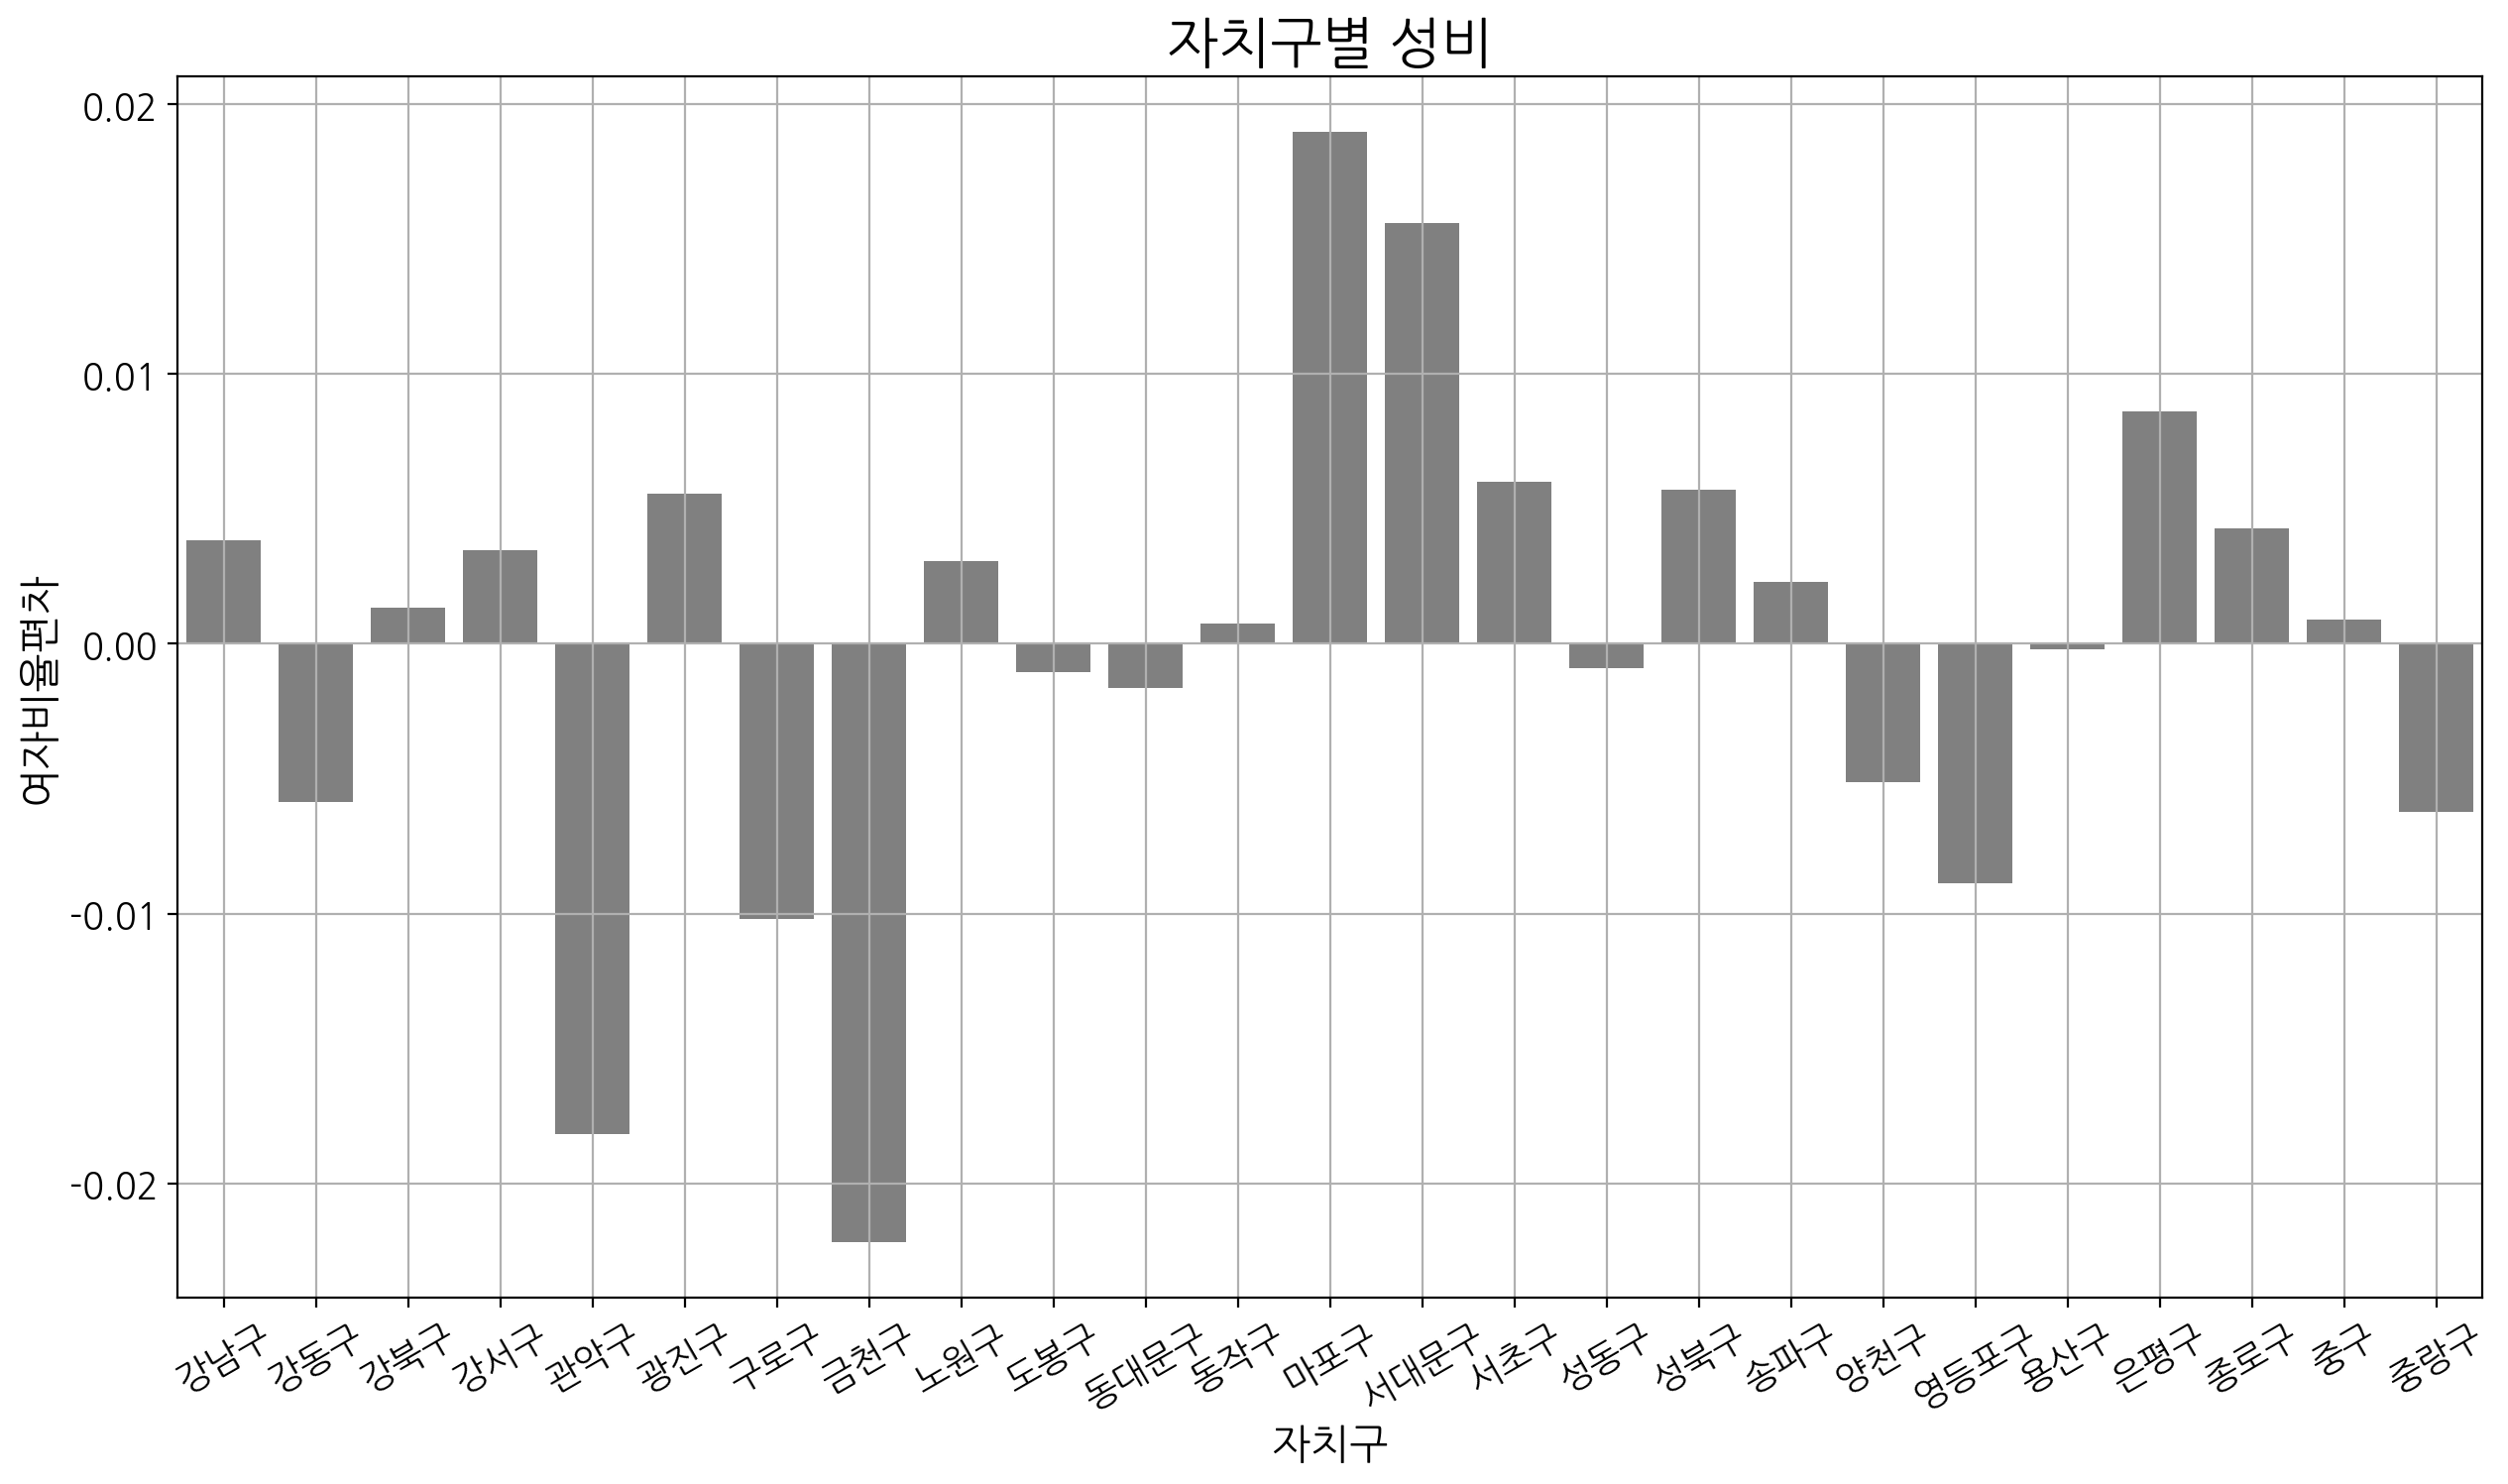

In [163]:
tmp = df[['자치구', '남자', '여자', '합계']]
tmp['여자비율'] = tmp['여자'] / tmp['합계']
tmp['여자비율편차'] = tmp['여자비율'] - tmp['여자비율'].mean()
#tmp = tmp.sort_values(['여자비율편차'], ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=tmp,
            x='자치구', y='여자비율편차',
            color='gray')

# plt.axhline(y=tmp['여자비율편차'].mean(),
#             color='r', linestyle='--',
#             label='평균선')

plt.title('자치구별 성비', fontsize=20)

plt.xticks(rotation=30, fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('자치구', fontsize=15)
plt.ylabel('여자비율편차', fontsize=15)

#plt.legend(loc='upper right', fontsize=15)
plt.grid()

plt.savefig(path + '자치구별성비.png', bbox_inches='tight')
plt.show()

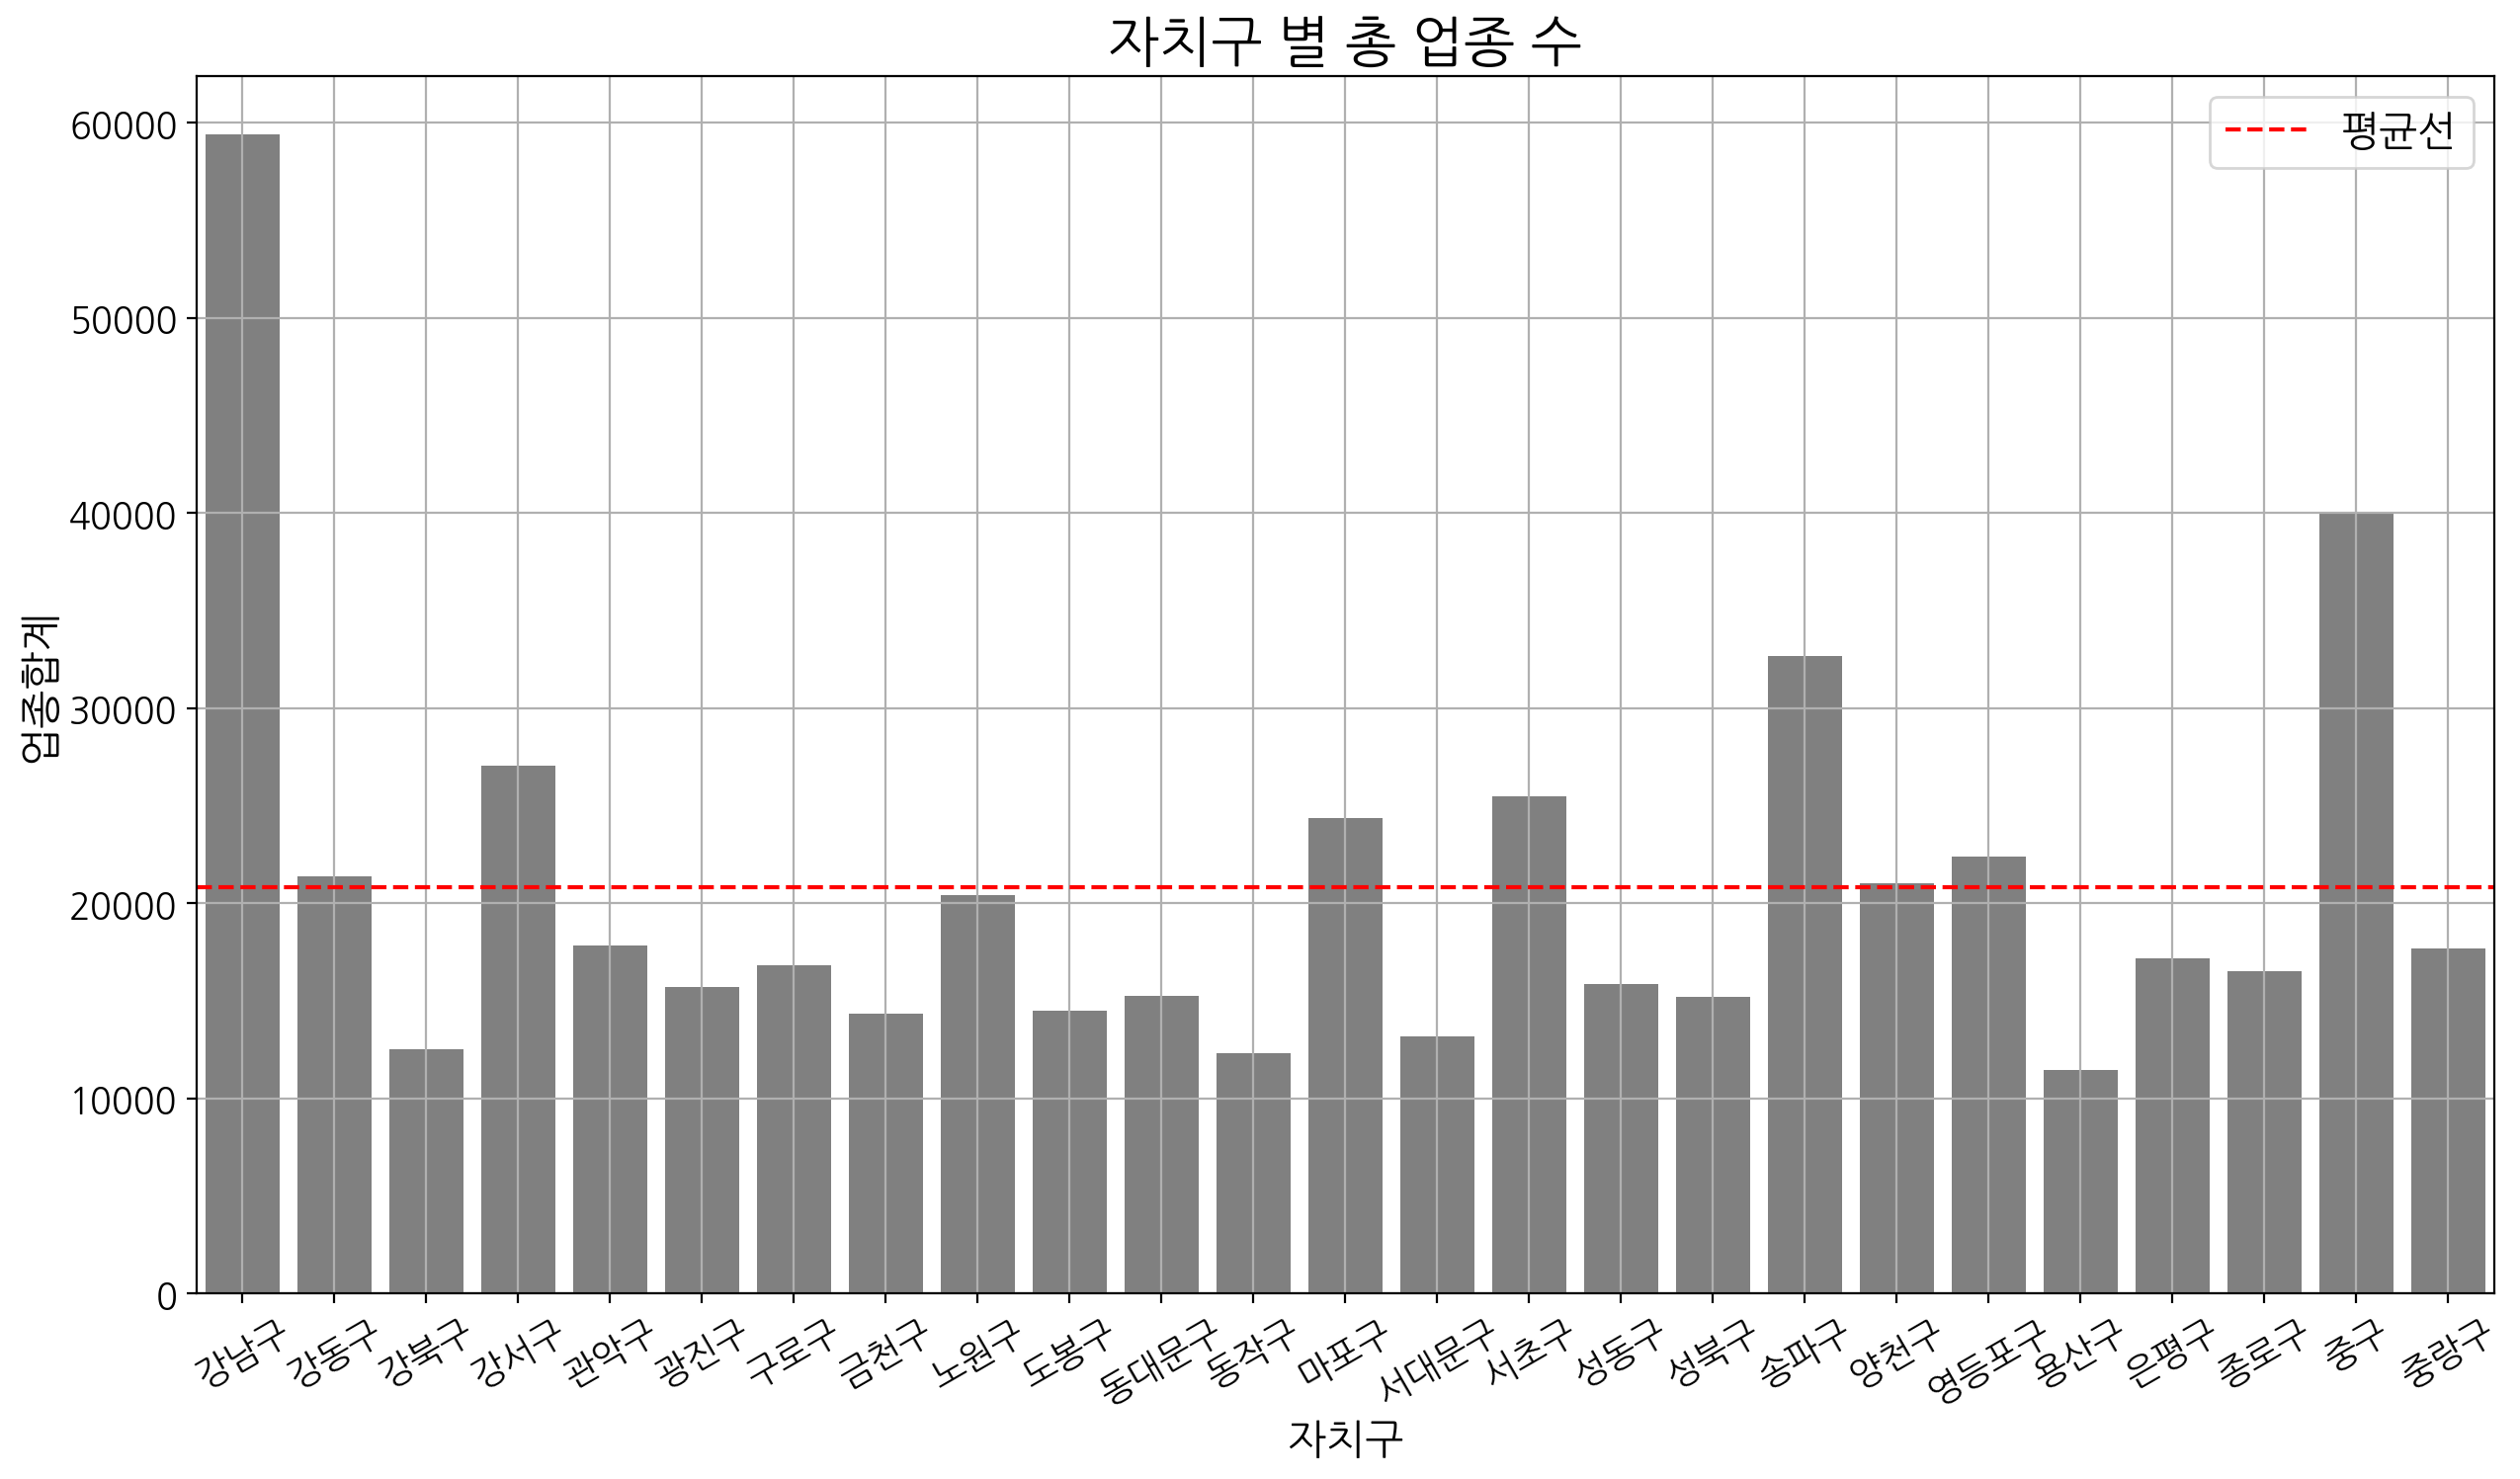

In [164]:
tmp = df[['자치구', '업종합계']]#.sort_values(['업종합계'], ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=tmp,
            x='자치구', y='업종합계',
            color='gray')

plt.axhline(y=tmp['업종합계'].mean(),
            color='r', linestyle='--',
            label='평균선')

plt.title('자치구 별 총 업종 수', fontsize=20)

plt.xticks(rotation=30, fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('자치구', fontsize=15)
plt.ylabel('업종합계', fontsize=15)

plt.legend(loc='upper right', fontsize=15)
plt.grid()

plt.savefig(path + '자치구별총업종수.png', bbox_inches='tight')
plt.show()

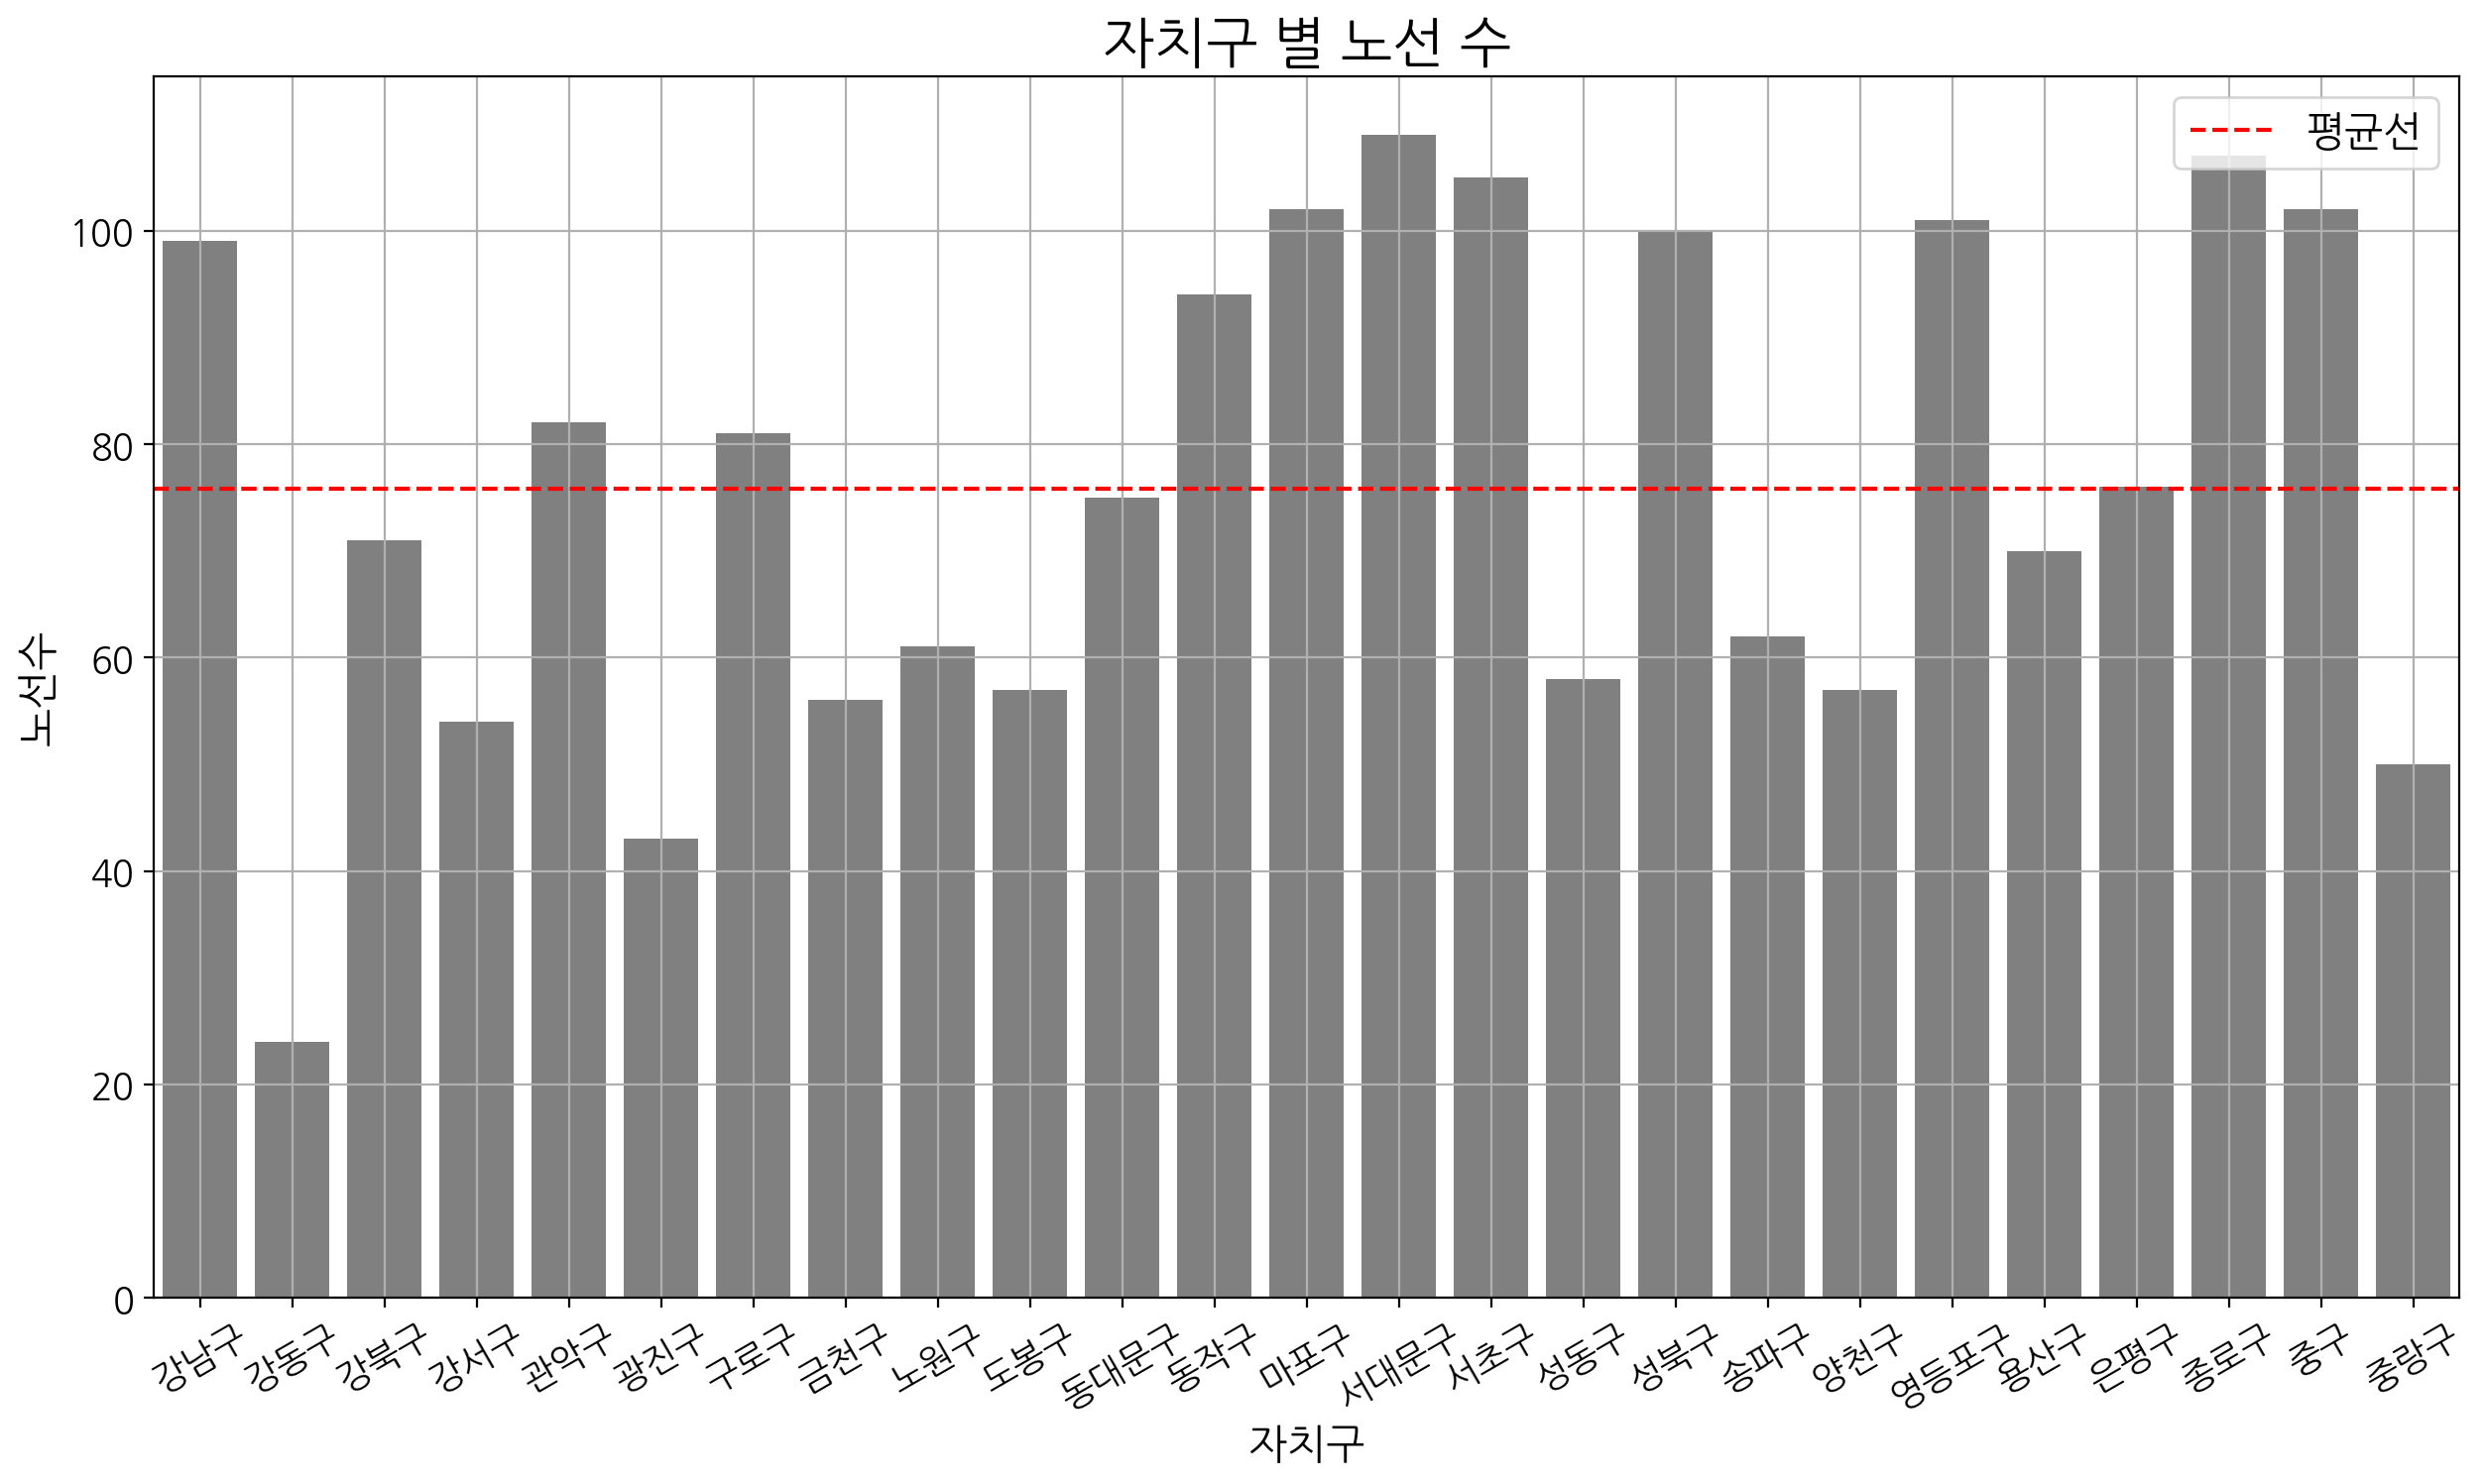

In [171]:
tmp = df[['자치구', '노선수']]#.sort_values(['노선수'], ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=tmp,
            x='자치구', y='노선수',
            color='gray')

plt.axhline(y=tmp['노선수'].mean(),
            color='r', linestyle='--',
            label='평균선')

plt.title('자치구 별 노선 수', fontsize=20)

plt.xticks(rotation=30, fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('자치구', fontsize=15)
plt.ylabel('노선수', fontsize=15)

plt.legend(loc='upper right', fontsize=15)
plt.grid()

plt.savefig(path + '자치구별노선수.png', bbox_inches='tight')
plt.show()

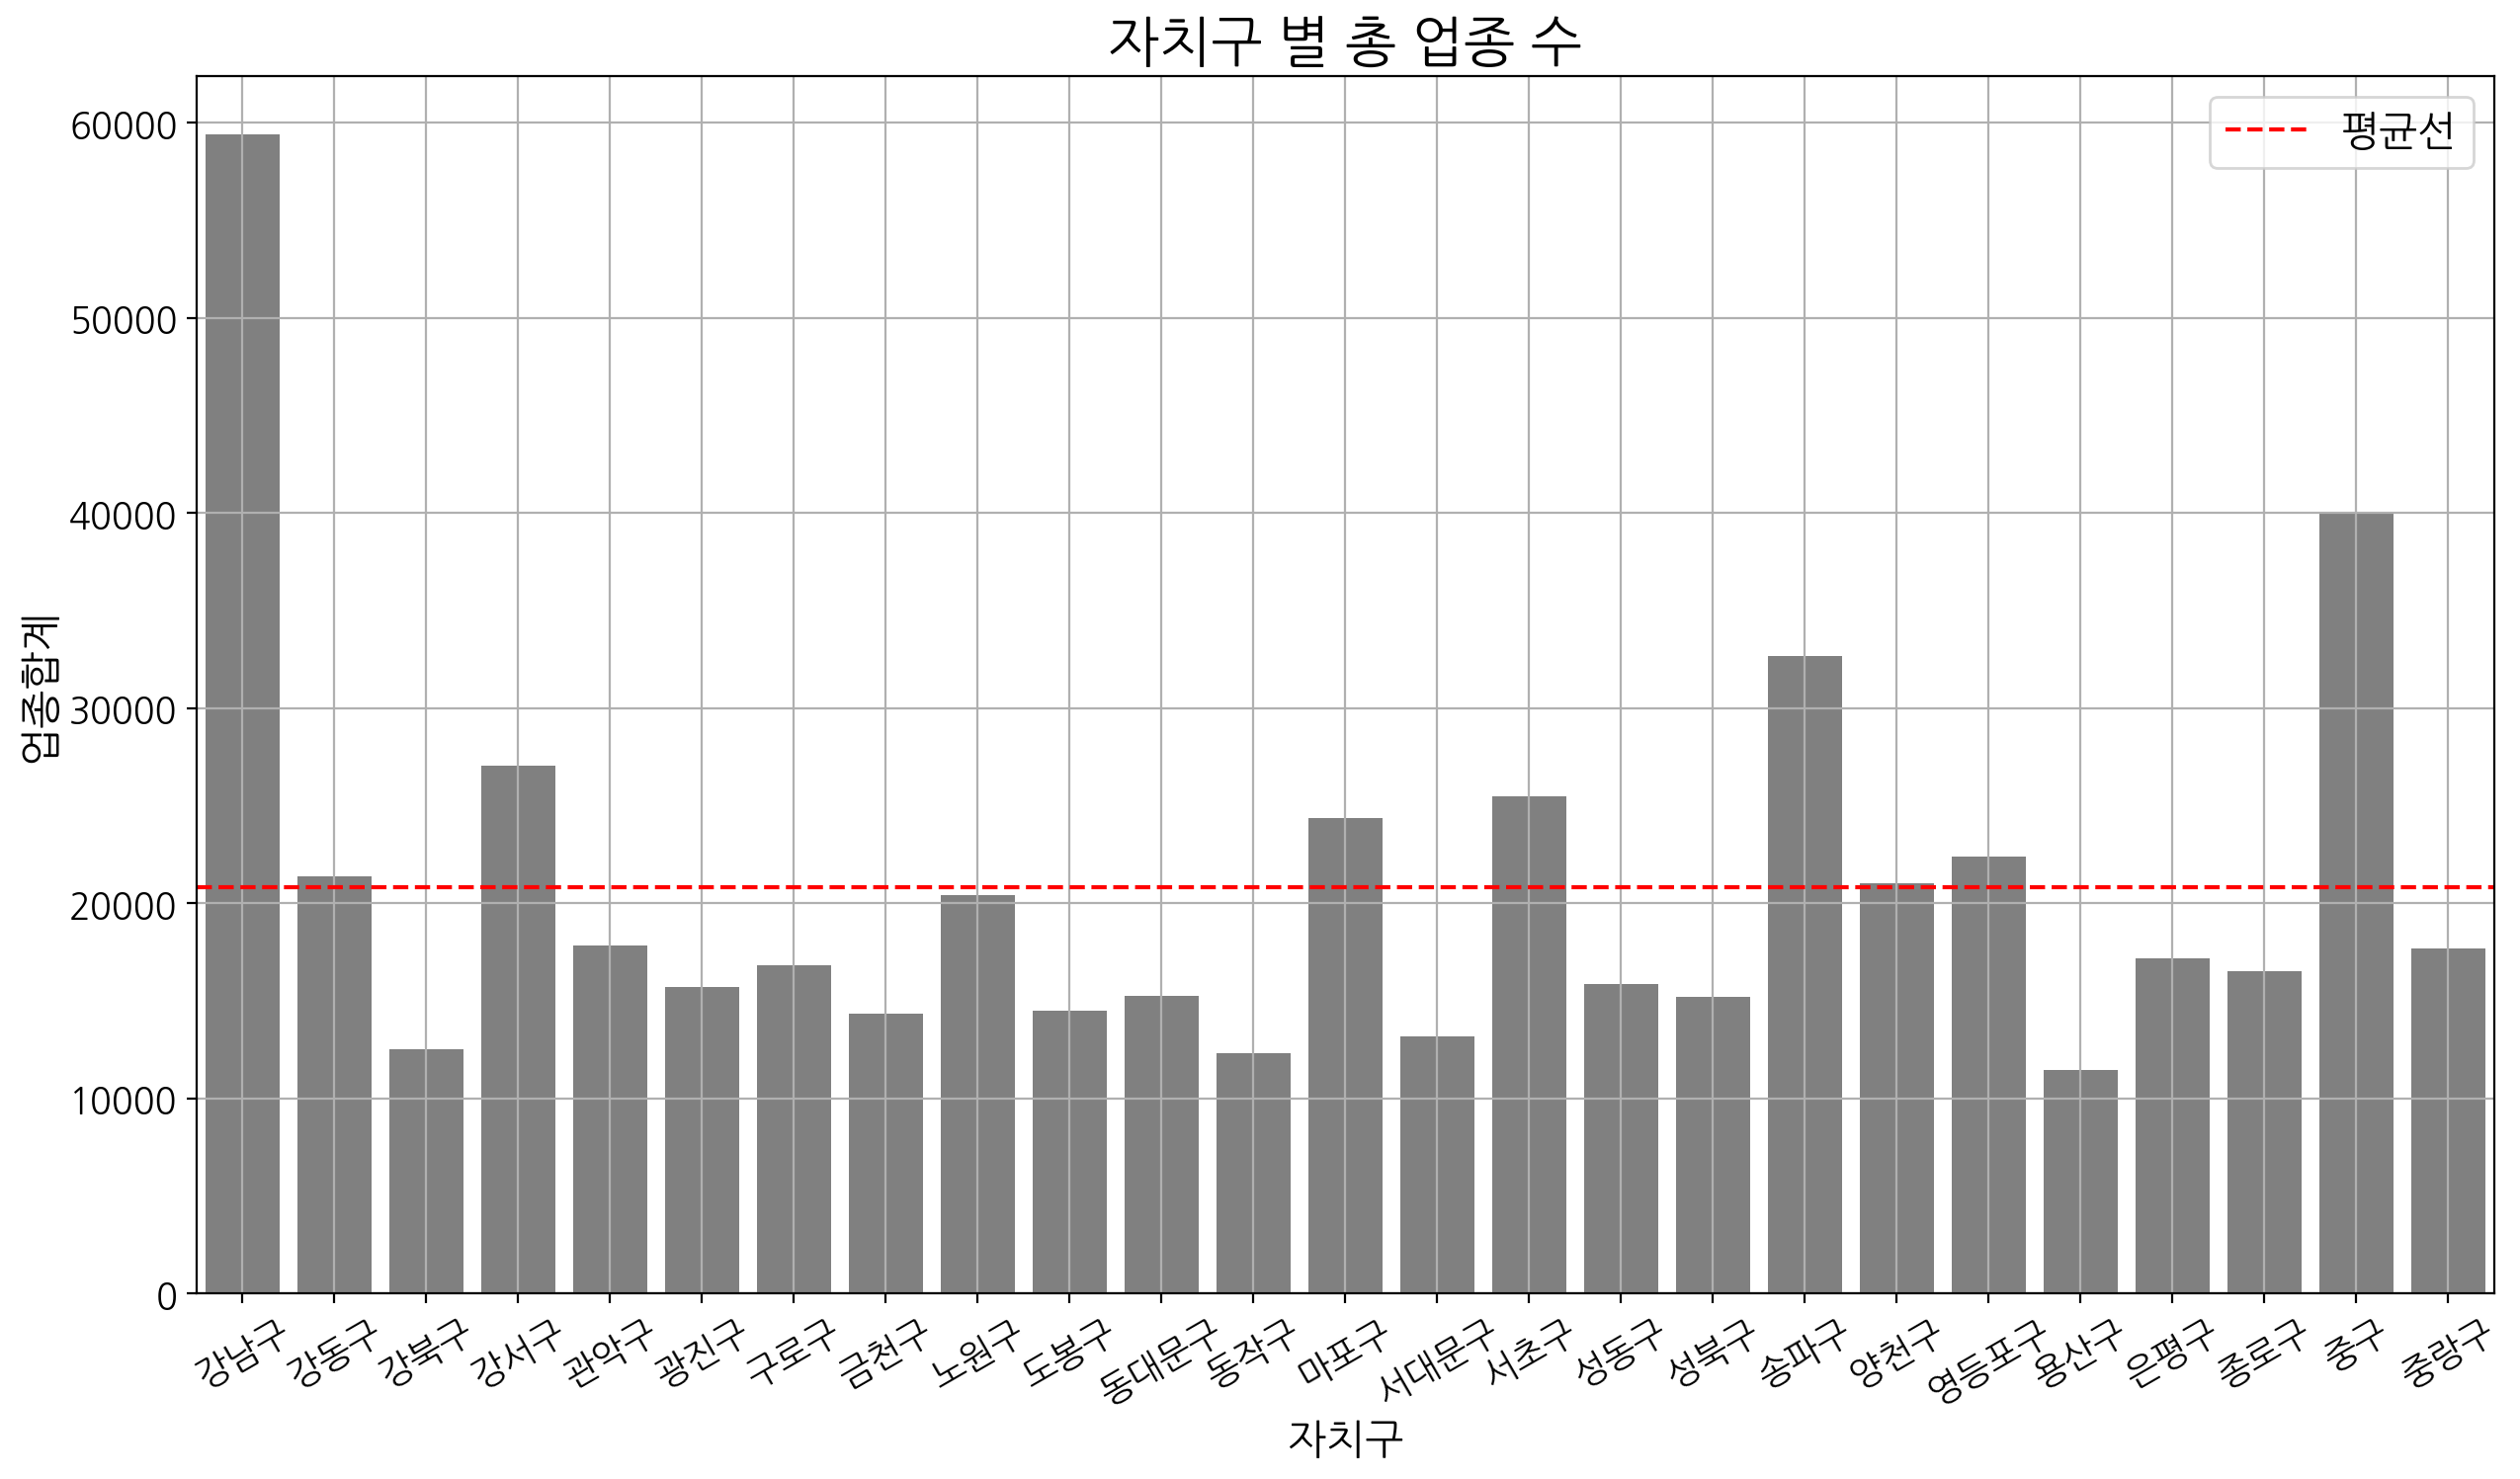

In [172]:
tmp = df[['자치구', '업종합계']]#.sort_values(['노선수'], ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=tmp,
            x='자치구', y='업종합계',
            color='gray')

plt.axhline(y=tmp['업종합계'].mean(),
            color='r', linestyle='--',
            label='평균선')

plt.title('자치구 별 총 업종 수', fontsize=20)

plt.xticks(rotation=30, fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('자치구', fontsize=15)
plt.ylabel('업종합계', fontsize=15)

plt.legend(loc='upper right', fontsize=15)
plt.grid()

plt.savefig(path + '자치구별총업종수.png', bbox_inches='tight')
plt.show()

In [52]:
# df.columns

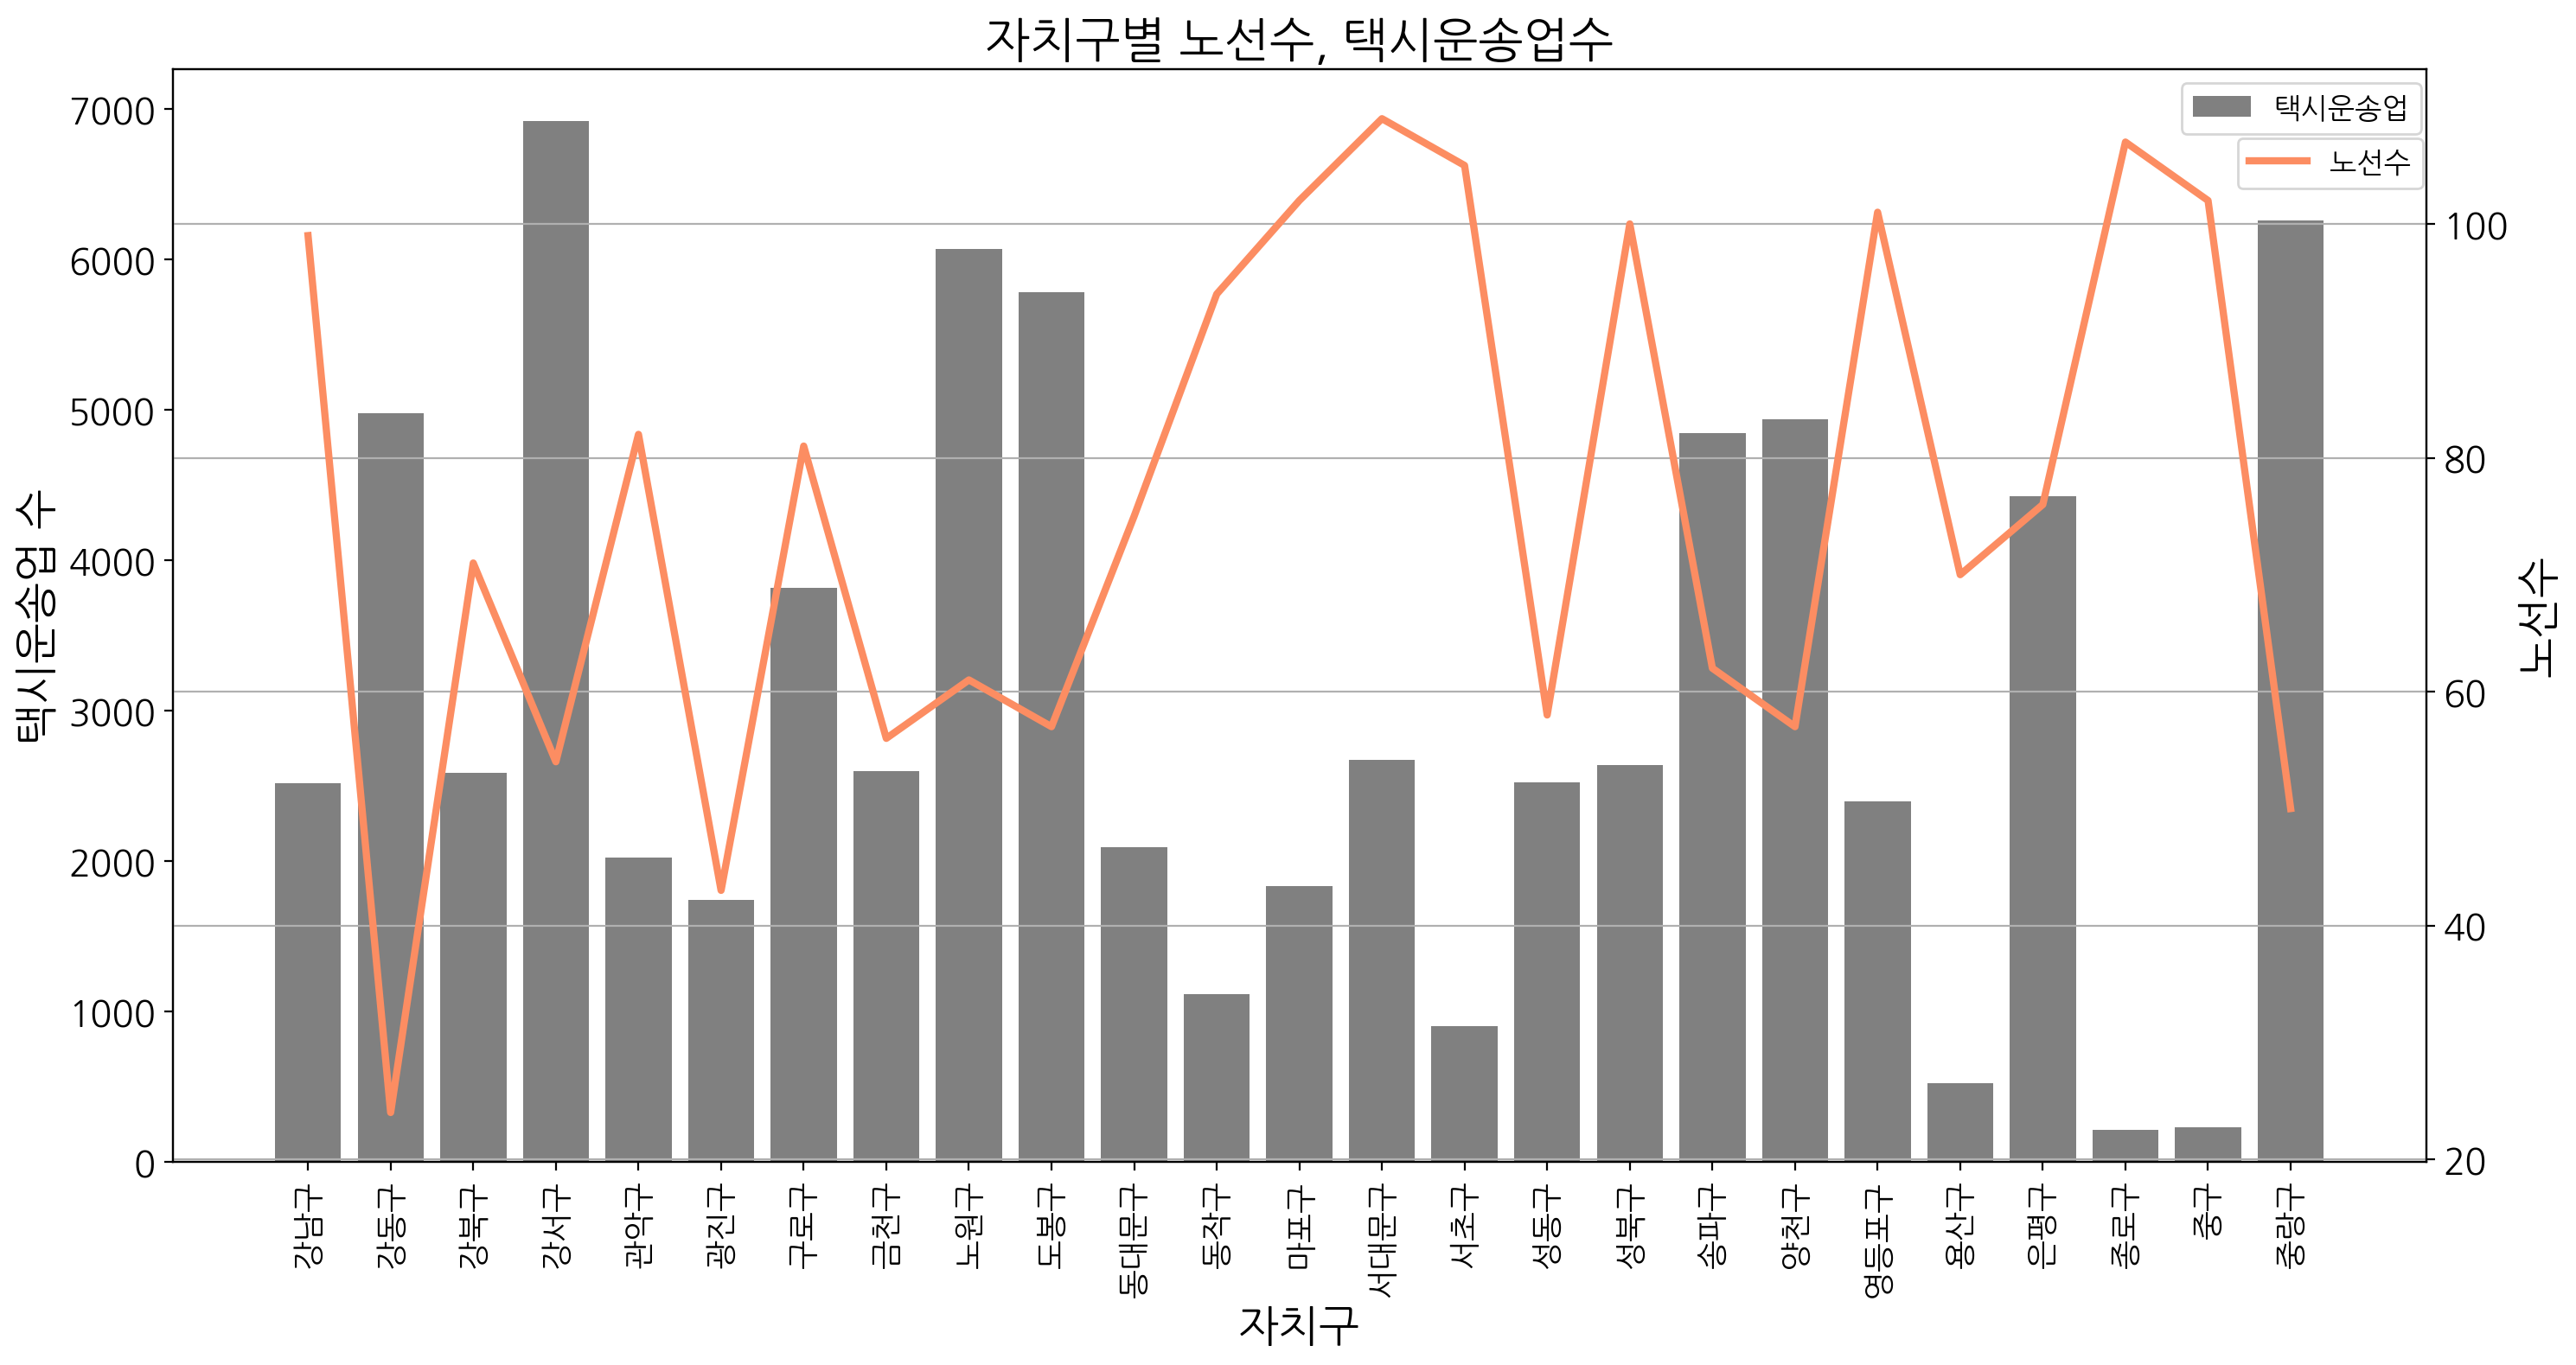

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터를 사용하여 그래프 생성
tmp = df[['자치구', '노선수', '택시운송업']] 

plt.figure(figsize=(15, 8))


ax = sns.barplot(data=tmp, x='자치구', y='택시운송업', color='gray', label='택시운송업')

# 두 번째 축 (노선수)
ax2 = ax.twinx()
ax2 = sns.lineplot(data=tmp, x='자치구', y='노선수', linewidth=3, color='#FC8D62', label='노선수')

# x축 라벨 설정
ax.set_xticklabels(labels=df['자치구'].values, rotation=90, fontsize=13)
ax.set_xlabel('자치구', fontsize=18)

# y축 라벨 및 눈금 크기 설정
ax.set_ylabel('택시운송업 수', fontsize=18)
ax2.set_ylabel('노선수', fontsize=18)
ax.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)

# 범례 설정 (위치를 조정하여 겹침 해결)
ax.legend(loc='upper left', bbox_to_anchor=(0.885, 1), fontsize=12)
ax2.legend(loc='upper left', bbox_to_anchor=(0.91, 0.95), fontsize=12)

plt.title('자치구별 노선수, 택시운송업수', fontsize=20)

plt.grid()

plt.tight_layout()
plt.savefig(path + '자치구별노선수택시운송업수.png', bbox_inches='tight')
plt.show()

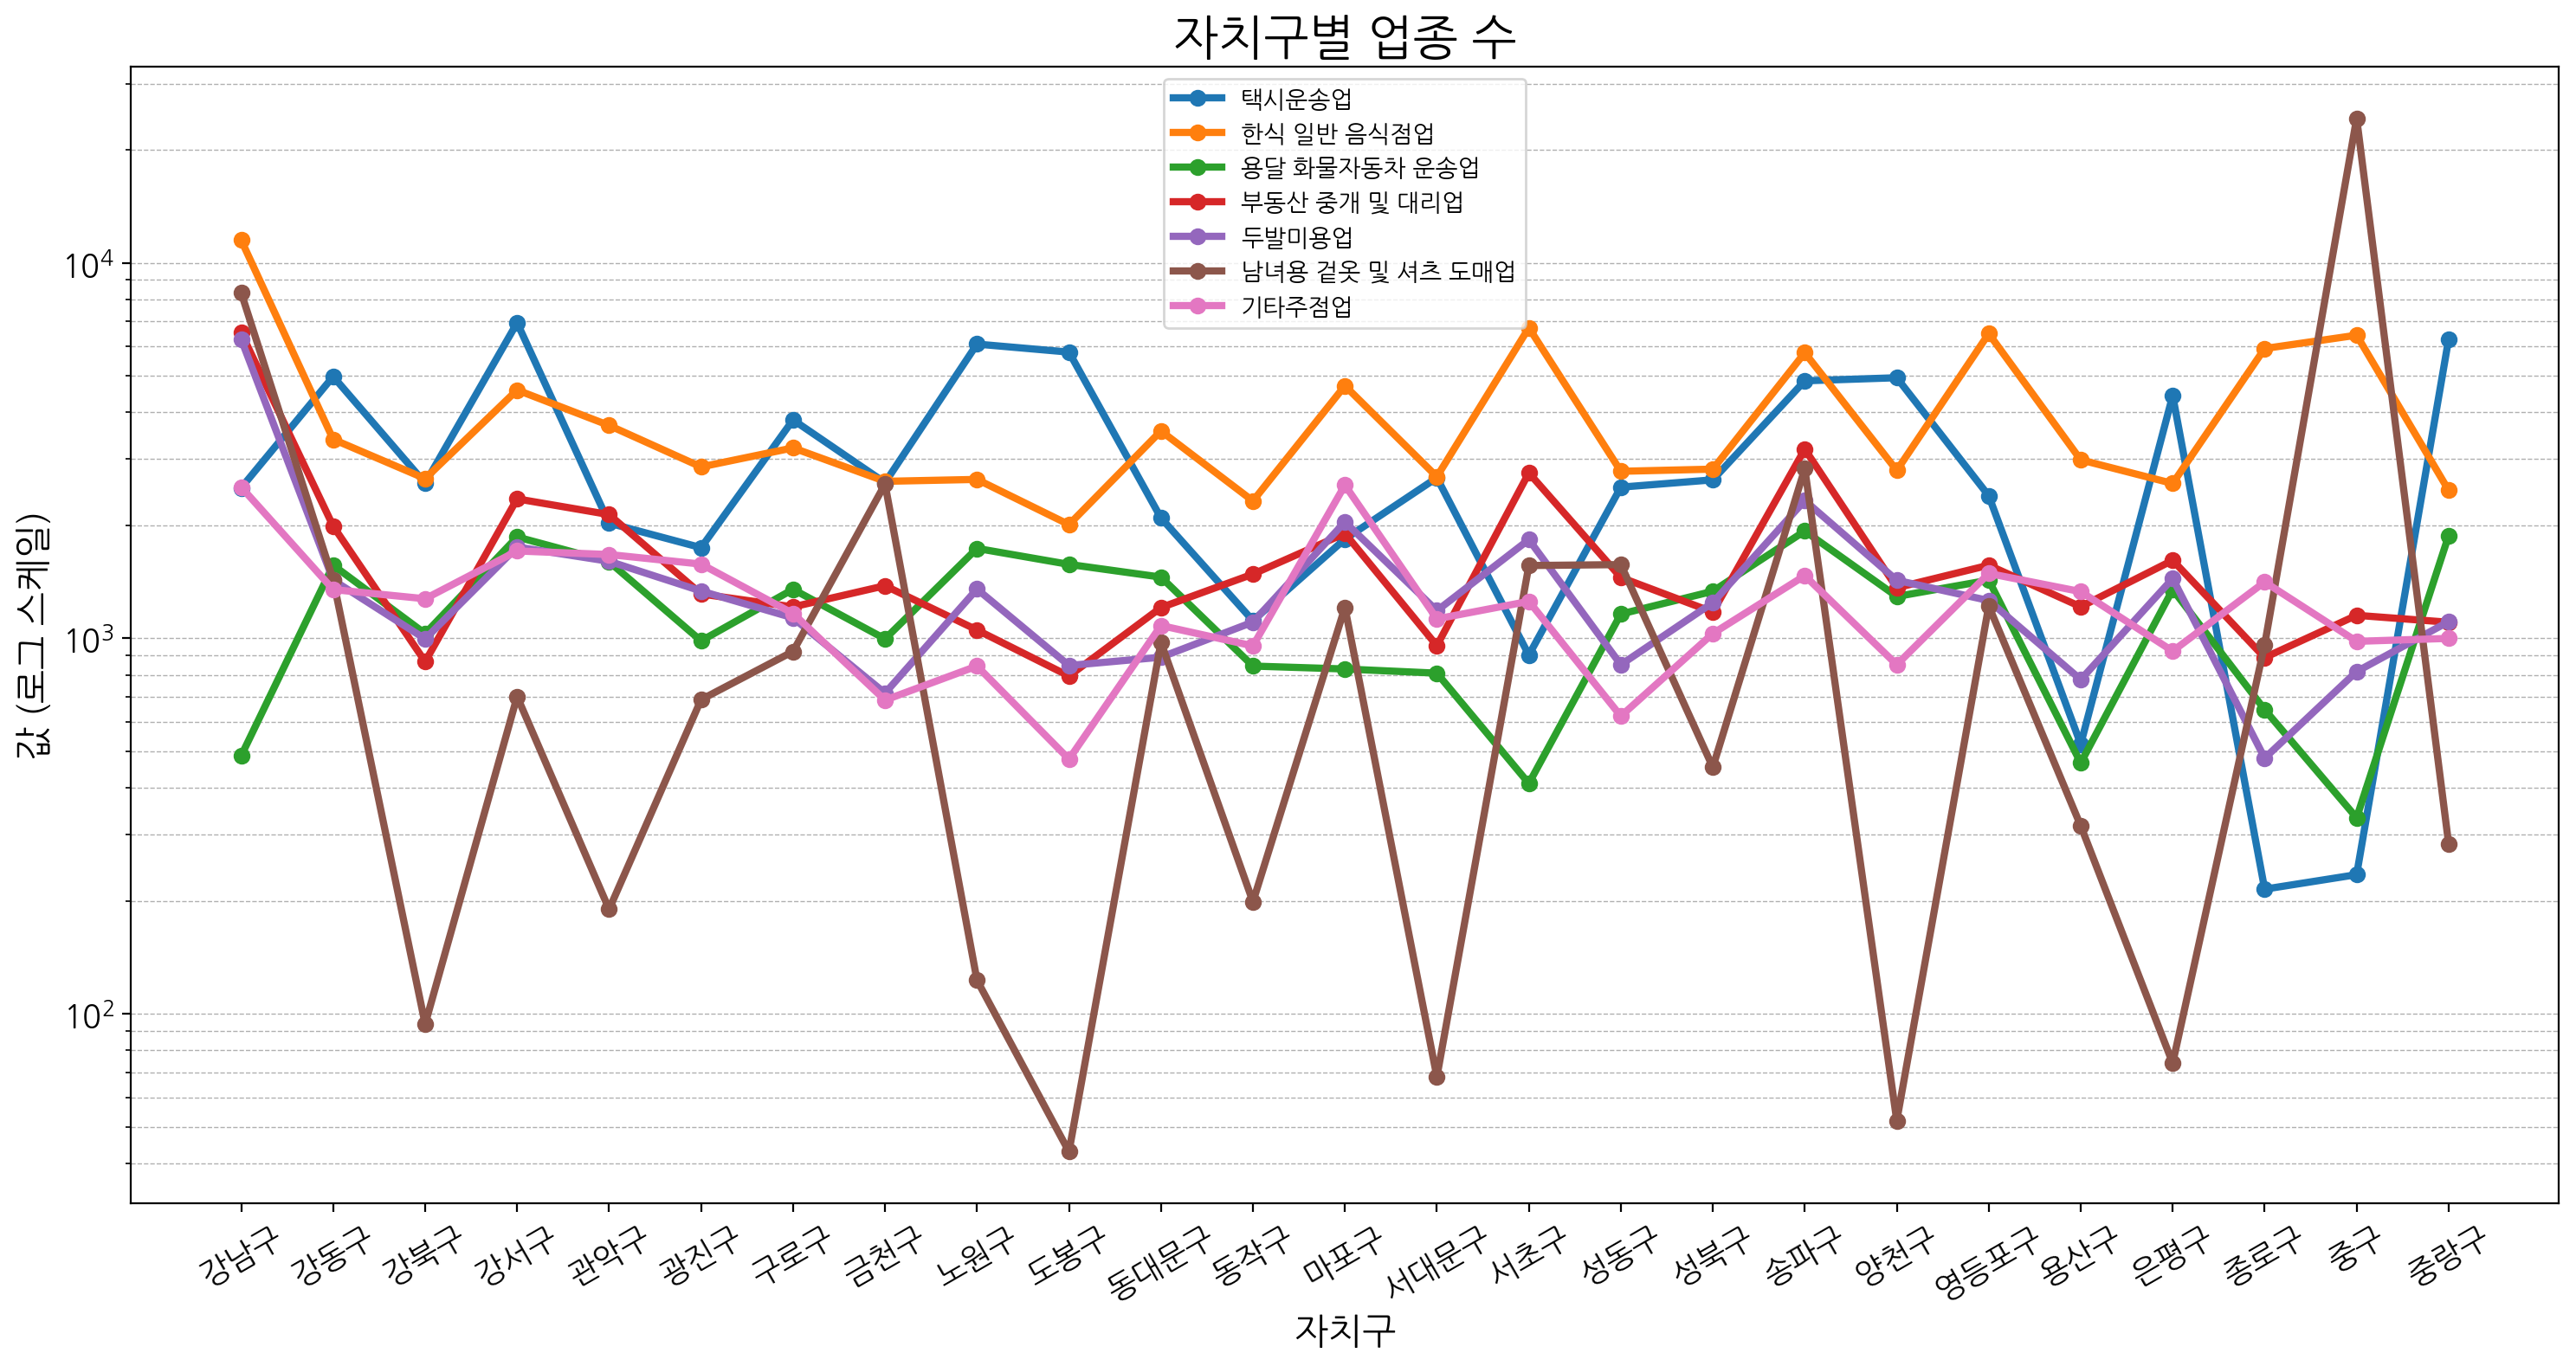

In [104]:
usecols = ['택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',
       '남녀용 겉옷 및 셔츠 도매업', '기타주점업']

plt.figure(figsize=(15,8))

for column in usecols:
       
    plt.plot(df['자치구'], df[column], 
             marker='o', 
             label=column,
             linewidth=3)

plt.title('자치구별 업종 수', fontsize=20)
plt.xlabel('자치구', fontsize=15)
plt.ylabel('값 (로그 스케일)', fontsize=15)
plt.yscale('log')  # y축에 로그 스케일 적용

plt.legend(loc='best', fontsize='small')
plt.yticks(fontsize=13)
plt.xticks(rotation=30, fontsize=13)

# 촘촘한 그리드 추가
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.legend(loc='best')


plt.tight_layout()
plt.savefig(path + '자치구별업종수.png', bbox_inches='tight')
plt.show()

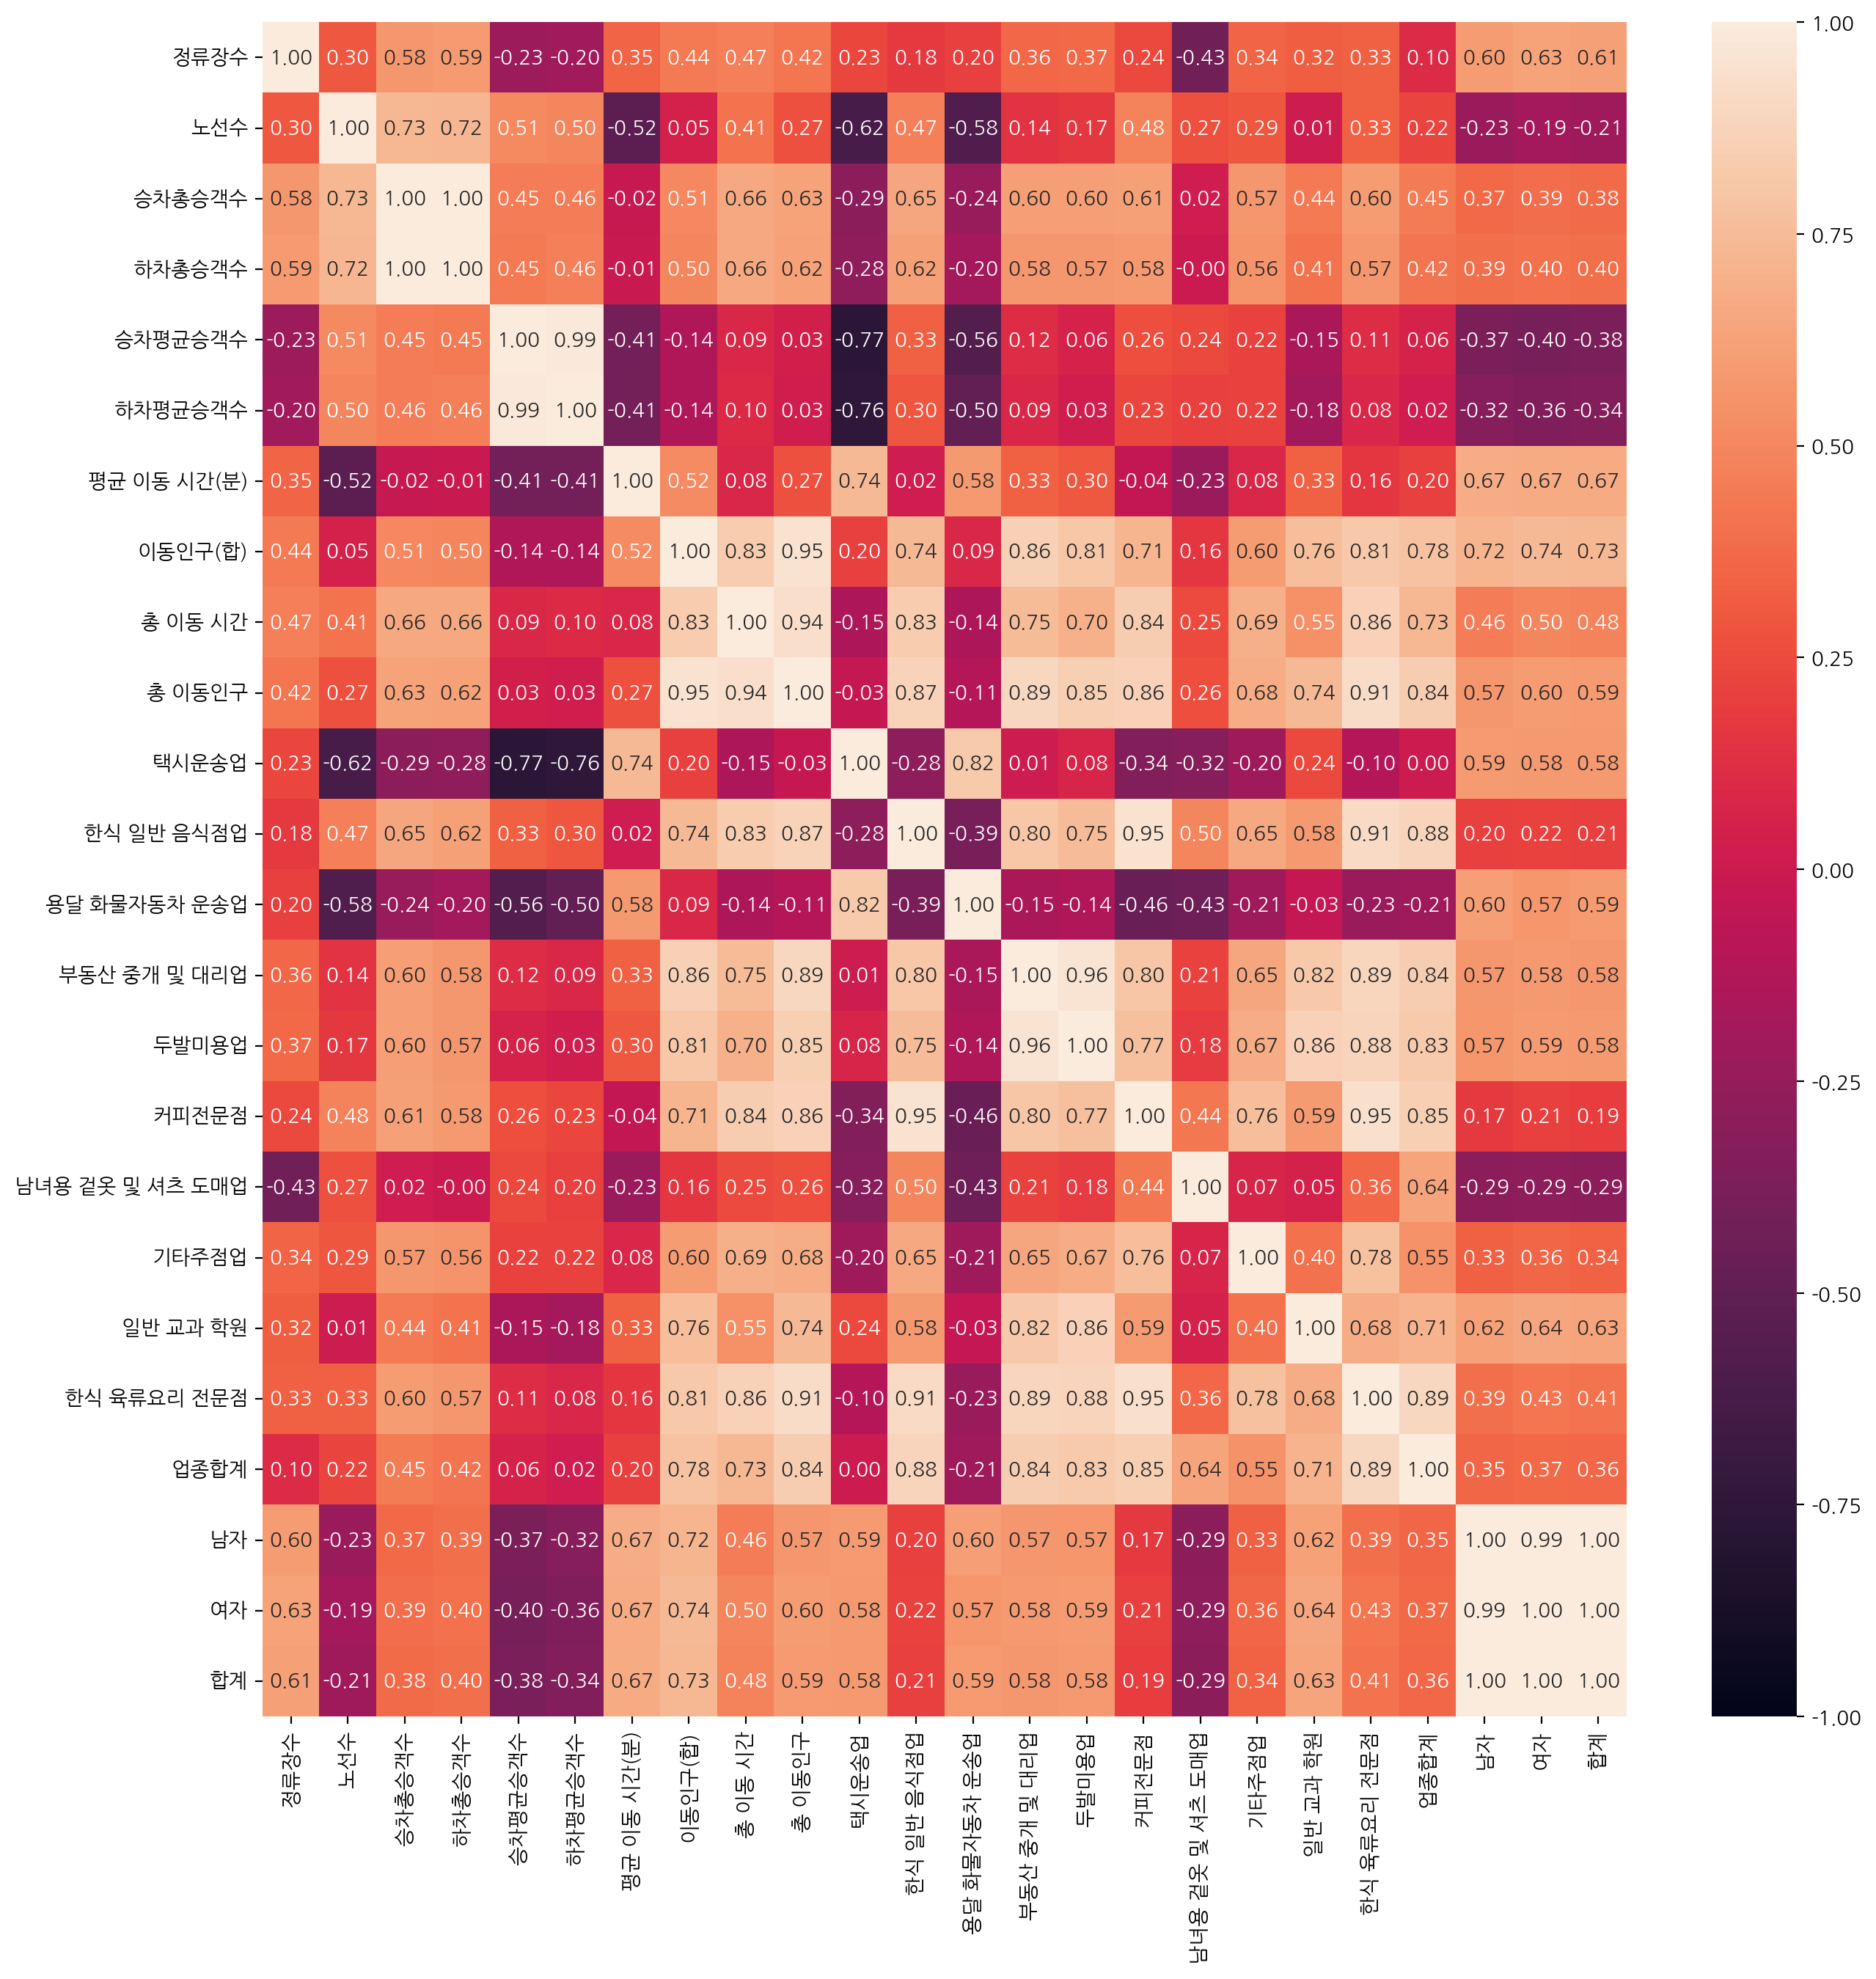

In [96]:
# 상관계수를 HeatMap으로 시각화
corr_df = df.drop(['자치구'], axis=1).corr()

plt.figure(figsize=(15,15))
sns.heatmap(data=corr_df,
            annot=True, fmt='.2f',
            vmin=-1.0, vmax=1.0)

plt.savefig(path + '상관관계.png', bbox_inches='tight')
plt.show()

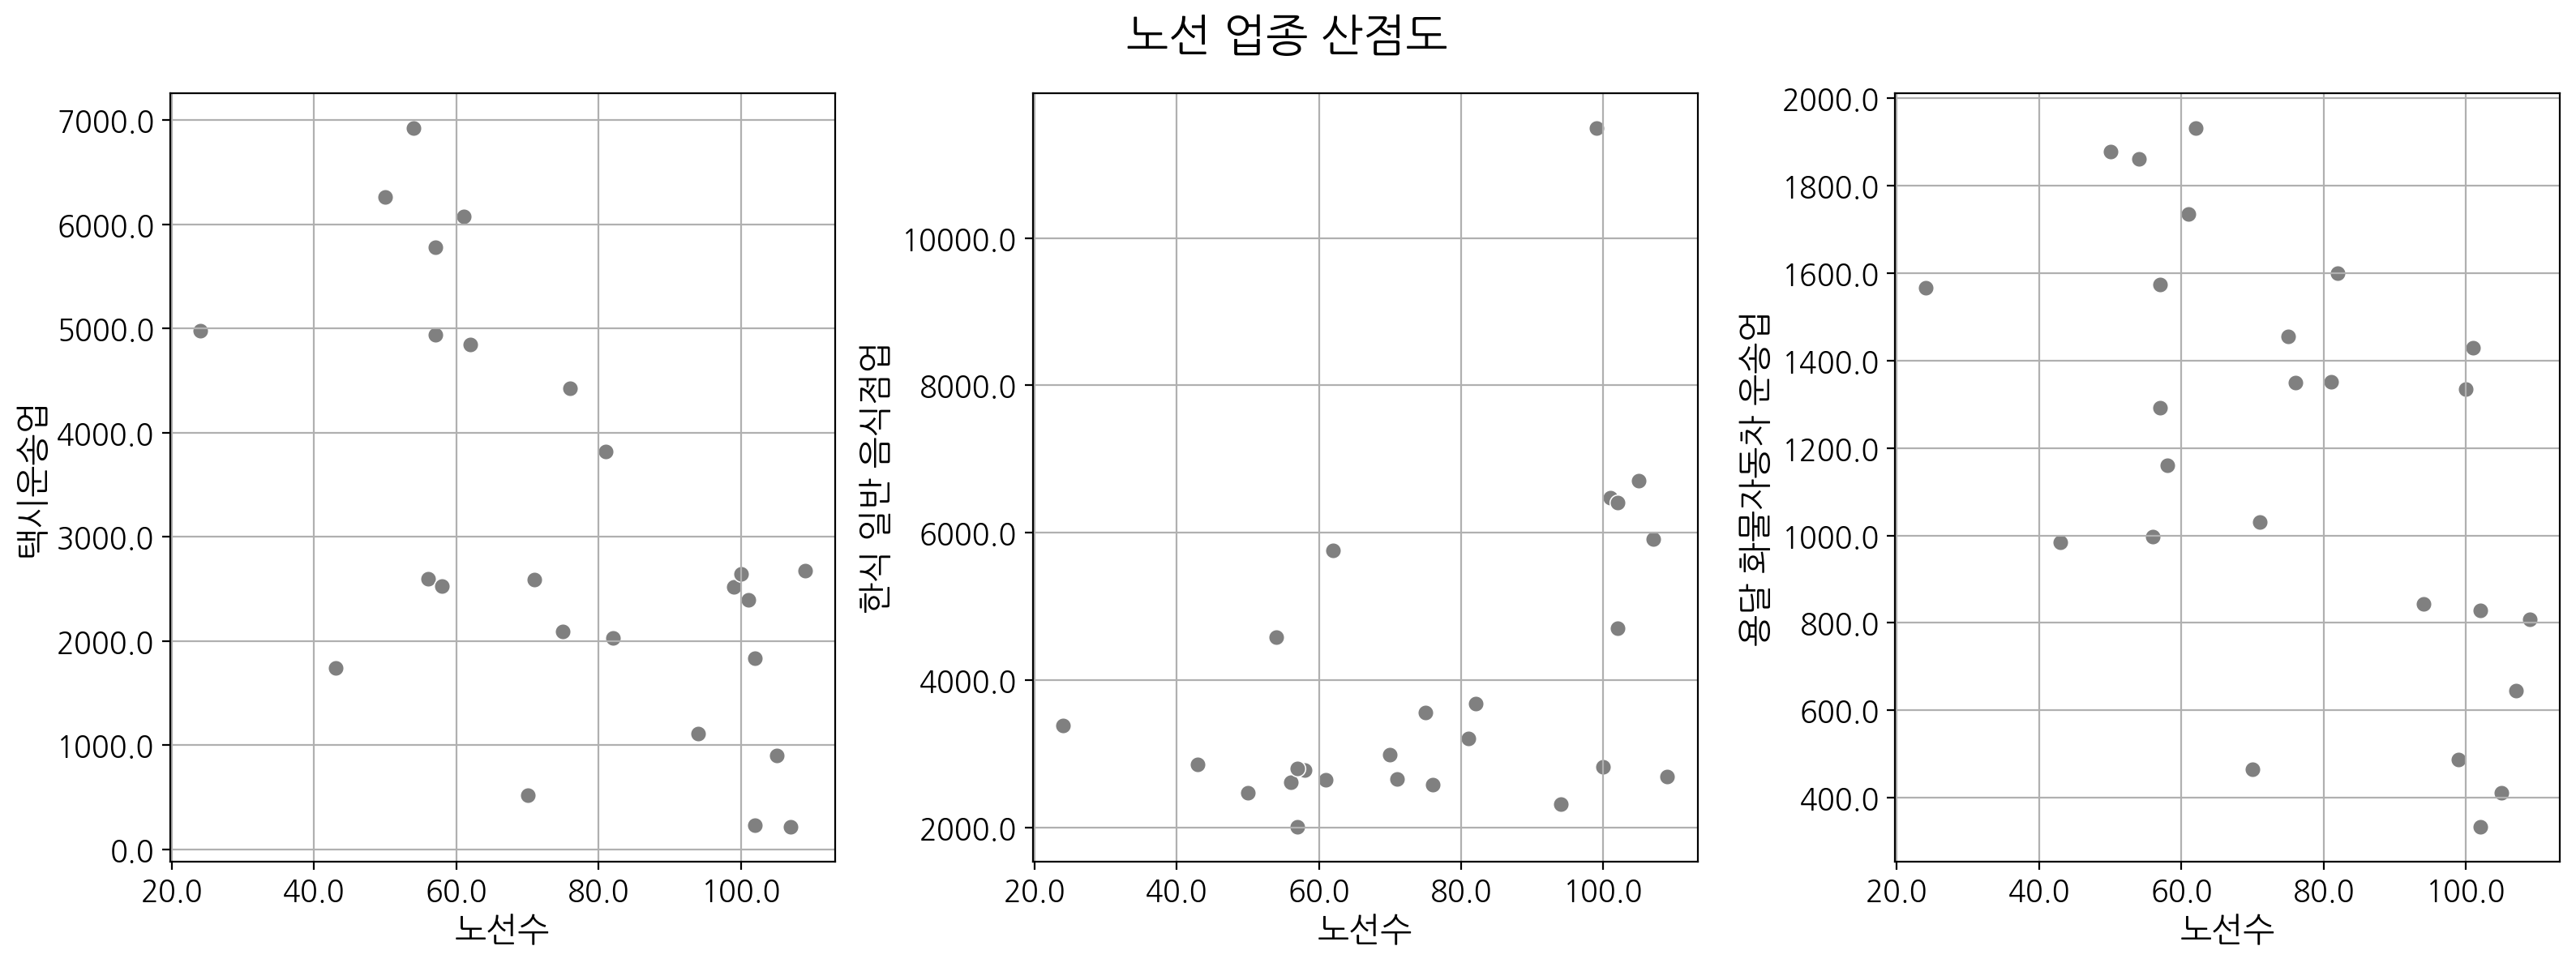

In [168]:
plt.figure(figsize=(16,6))
for idx, y in enumerate(usecols[:3]):
    ax = plt.subplot(1, 3, idx+1)
    sns.scatterplot(data=df,
                    x='노선수', y=y,
                    ax=ax, color='gray',
                    s=50)
    ax.grid()
    ax.set_xlabel('노선수',fontsize=15)
    ax.set_xticklabels(ax.get_xticks(), fontsize=13)
    
    ax.set_ylabel(y,fontsize=15)
    ax.set_yticklabels(ax.get_yticks(), fontsize=13)
    
plt.suptitle('노선 업종 산점도', fontsize=20)
plt.tight_layout()
#plt.savefig(path + '노선업종산점도1.png', bbox_inches='tight')
plt.show()

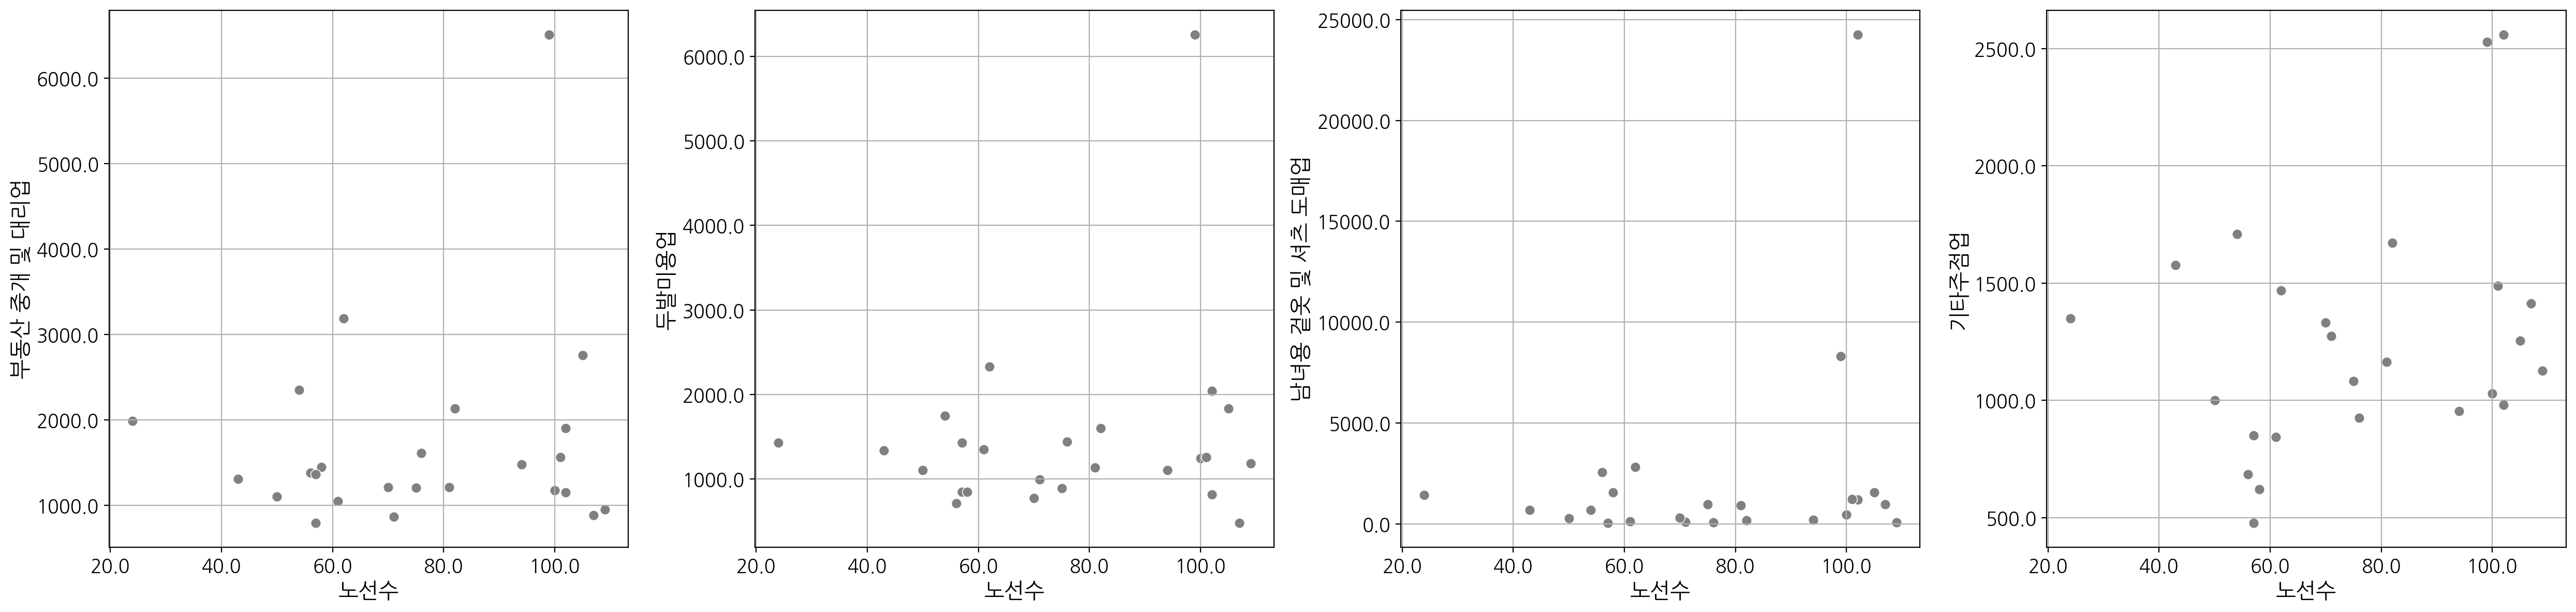

In [139]:
plt.figure(figsize=(25,6))
for idx, y in enumerate(usecols[3:]):
    ax = plt.subplot(1, 4, idx+1)
    sns.scatterplot(data=df,
                    x='노선수', y=y,
                    ax=ax, color='gray',
                    s=50)
    ax.grid()
    ax.set_xlabel('노선수',fontsize=15)
    ax.set_xticklabels(ax.get_xticks(), fontsize=13)
    
    ax.set_ylabel(y,fontsize=15)
    ax.set_yticklabels(ax.get_yticks(), fontsize=13)
    
#plt.suptitle('노선 업종 산점도', fontsize=20)
plt.tight_layout()
plt.savefig(path + '노선업종산점도2.png', bbox_inches='tight')
plt.show()

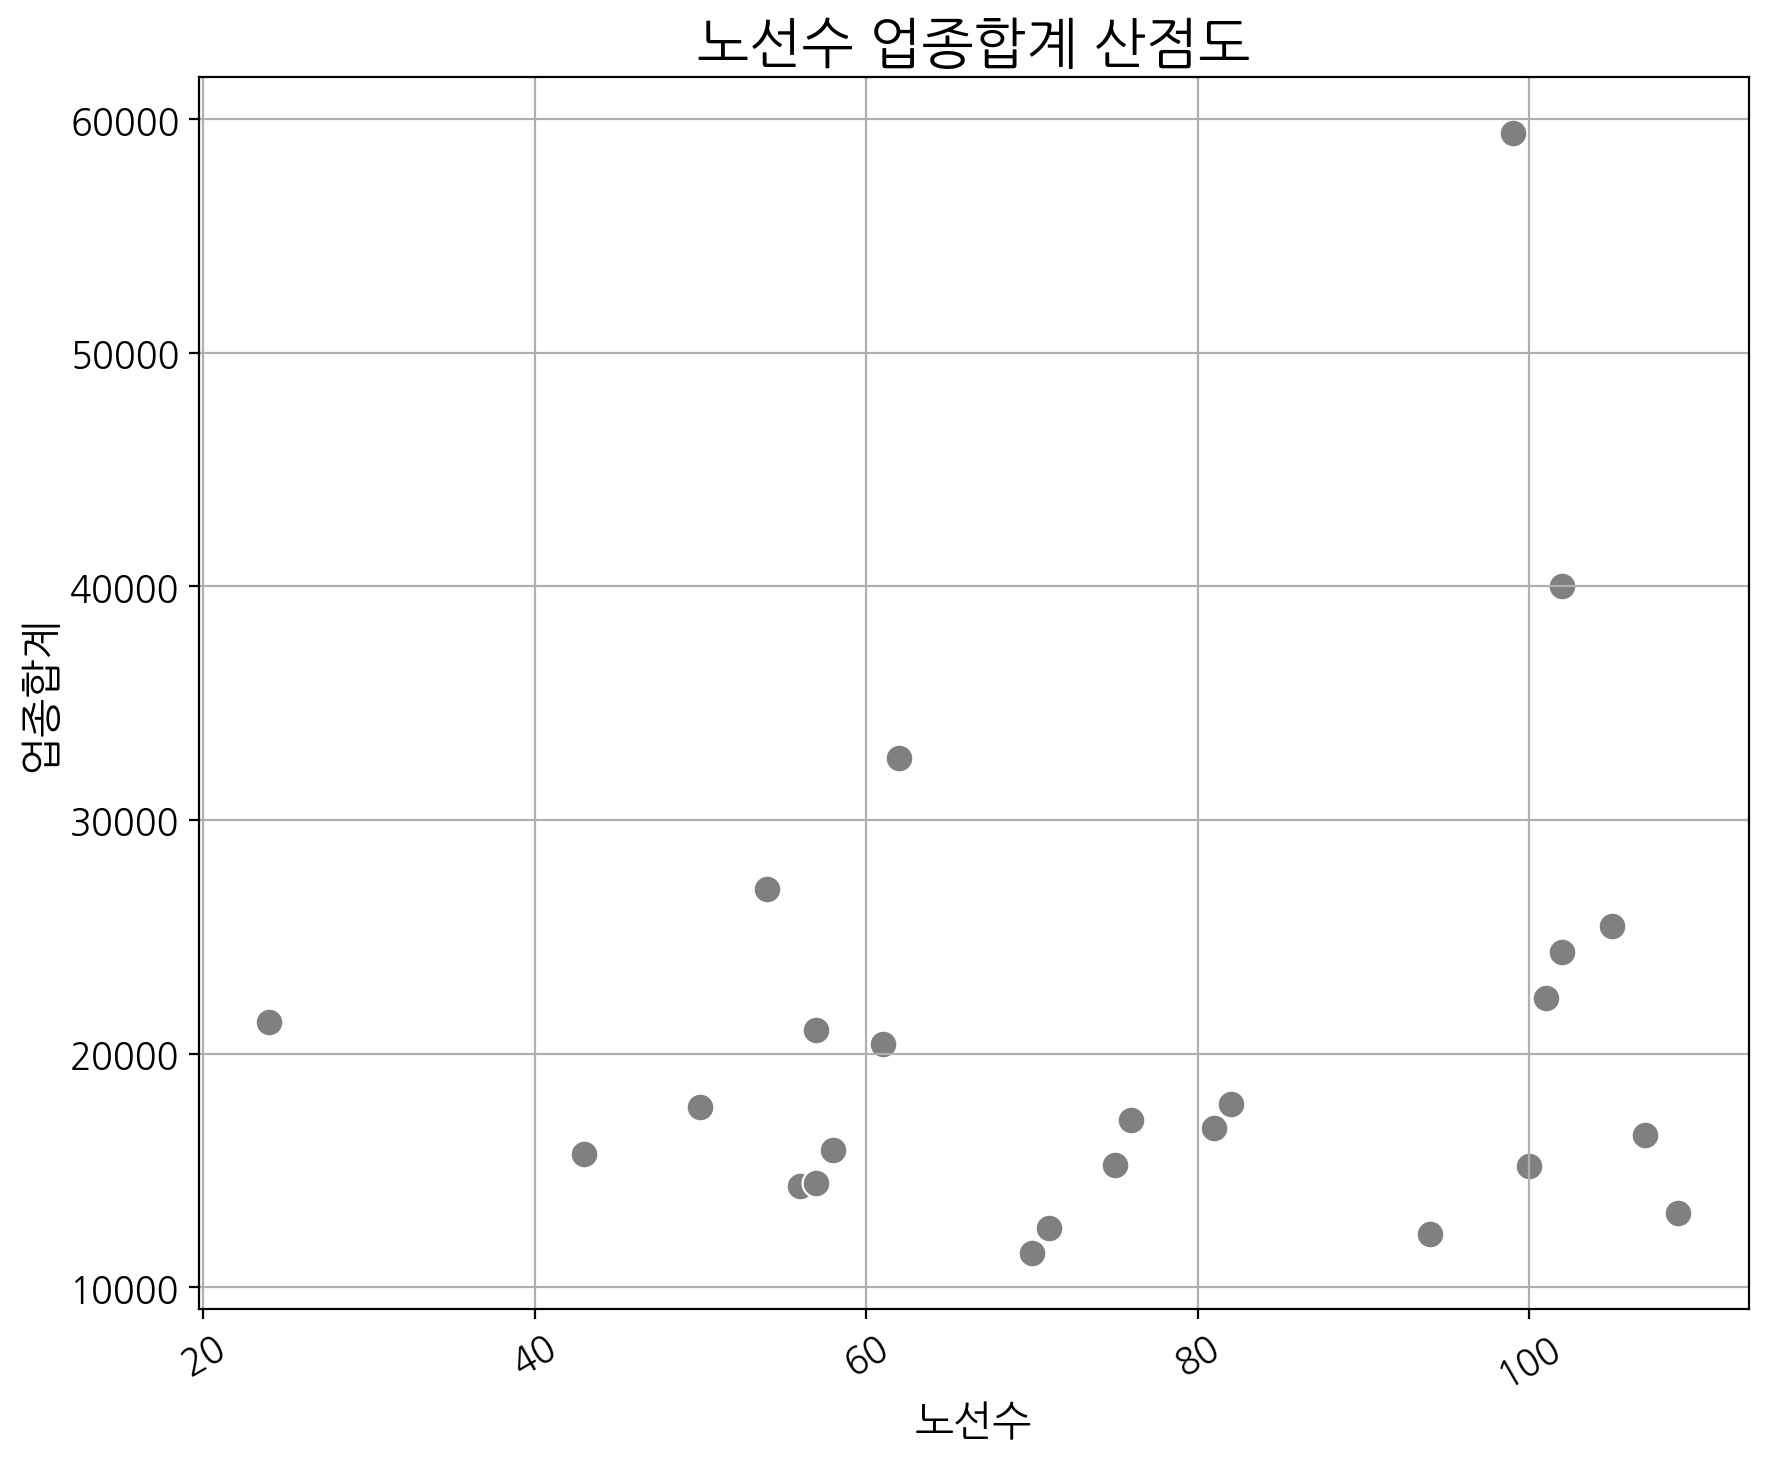

In [178]:
tmp = df[['노선수', '업종합계']]#.rank()#.sort_values(['노선수'], ascending=False)

plt.figure(figsize=(10,8))
sns.scatterplot(data=tmp,
                x='노선수', y='업종합계',
                color='gray',
                s=100)

# plt.axhline(y=tmp['업종합계'].mean(),
#             color='r', linestyle='--',
#             label='평균선')

plt.title('노선수 업종합계 산점도', fontsize=20)

plt.xticks(rotation=30, fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('노선수', fontsize=15)
plt.ylabel('업종합계', fontsize=15)

# plt.legend(loc='upper right', fontsize=15)
plt.grid()

# plt.savefig(path + '노선수업종합계산점도.png', bbox_inches='tight')
plt.show()

In [ ]:
# 총이동인구, 총이동시간 -> 산점도